#Анализ социалогического опроса и поиск зависимостей в данных

**Работу выполнили:** Катвалян Эдгар,Агапов Андрей,Бирюков Никита,Мартыненко Илья

**Группа:** БФБО-03-21

#Импортирование данных

In [ ]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 21.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import phik
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from scipy.stats import shapiro
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


from statsmodels.tools.tools import add_constant as ac


warnings.filterwarnings("ignore")
sns.set_theme(style="ticks", palette="pastel")
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data_science/data.csv')

In [ ]:
data['Образование'].unique()

array(['3', '4', '2', '3, 3', '1'], dtype=object)

#Предобработка данных


In [ ]:
def get_data_info(data):
    display(data.sample(20))
    display(data.info())
    display(data.describe(include='all'))

In [ ]:
get_data_info(data)

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
372,1,4,4,98,91,87,31,96,78,48,17,47,0,2,33
182,2,4,5,70,59,0,94,86,91,52,36,64,30,57,19
141,1,4,3,62,79,66,98,64,60,34,54,34,35,57,21
845,1,3,3,40,64,87,80,17,18,74,91,78,34,2,46
796,1,4,4,96,39,53,17,47,36,80,89,84,2,0,21
97,1,4,6,69,69,13,34,57,28,97,54,59,36,4,20
740,1,3,3,28,4,66,24,17,11,52,81,52,36,54,78
724,1,3,2,79,78,60,51,17,49,87,98,72,2,10,37
876,1,3,3,64,68,89,34,17,34,82,86,12,28,21,21
436,2,3,1,77,78,95,51,100,66,14,19,39,18,2,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Пол                1034 non-null   object
 1   Образование        1034 non-null   object
 2   Уровень должности  1034 non-null   int64 
 3   Настороженность    1034 non-null   int64 
 4   Расчётливость      1034 non-null   int64 
 5   Жёсткость          1034 non-null   int64 
 6   Независимость      1034 non-null   int64 
 7   Авантюризм         1034 non-null   int64 
 8   Непрактичность     1034 non-null   int64 
 9   Осторожность       1034 non-null   int64 
 10  Нормативность      1034 non-null   int64 
 11  Жертвенность       1034 non-null   int64 
 12  Эмоциональность    1034 non-null   int64 
 13  Расслабленность    1034 non-null   int64 
 14  Безынициативность  1034 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 121.3+ KB


None

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
count,1034,1034,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
unique,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,691,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.344294,66.211799,48.596712,50.358801,58.043520,46.680851,46.900387,58.361702,62.679884,44.210832,38.969052,32.755319,43.552224
std,NaN,NaN,1.665501,27.592643,29.732184,31.919427,30.309265,30.143745,28.629839,24.422403,28.372454,33.106944,27.561337,27.171377,29.016397
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.000000,47.000000,24.000000,20.000000,32.000000,17.000000,21.000000,40.000000,39.000000,12.000000,20.000000,10.000000,21.000000
50%,NaN,NaN,3.000000,73.000000,50.000000,53.000000,54.000000,43.000000,47.000000,59.000000,70.000000,44.000000,34.000000,28.000000,33.000000
75%,NaN,NaN,4.000000,88.000000,74.000000,81.000000,89.000000,71.000000,69.000000,80.000000,89.000000,78.000000,63.000000,50.000000,70.000000


In [ ]:
data['Образование'].replace('3, 3', '3', inplace= True)

data['Пол'].replace('1, 1', '1', inplace= True)

In [ ]:
data['Пол'].replace(['1','2'],[0, 1], inplace= True)

In [ ]:
data['Образование'] = data['Образование'].astype(str).astype(int)

In [ ]:
data['Образование'].unique()

array([3, 4, 2, 1])

In [ ]:
data['Пол'].unique()

array([0, 1])

# **Удаляем выбросы**

In [ ]:
data['Образование'].unique()

array([3, 4, 2, 1])

In [ ]:
get_data_info(data)

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
686,0,3,2,87,14,53,52,17,78,81,59,18,26,57,21
528,0,3,3,70,43,19,95,11,94,48,43,0,66,27,77
1022,0,3,5,47,70,70,94,57,43,54,64,4,30,4,9
389,1,2,2,91,26,2,32,40,40,29,39,35,34,13,26
595,1,3,2,86,24,81,46,7,36,74,70,19,90,26,17
29,0,3,6,3,23,94,19,32,69,80,43,51,26,82,39
622,1,3,3,89,28,89,73,17,18,97,98,55,0,26,6
589,0,3,3,47,45,47,95,30,71,87,98,66,26,0,16
199,1,4,2,28,10,60,37,19,26,3,24,56,50,95,87
671,0,3,3,40,69,96,52,64,18,60,91,89,29,2,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                1034 non-null   int64
 1   Образование        1034 non-null   int64
 2   Уровень должности  1034 non-null   int64
 3   Настороженность    1034 non-null   int64
 4   Расчётливость      1034 non-null   int64
 5   Жёсткость          1034 non-null   int64
 6   Независимость      1034 non-null   int64
 7   Авантюризм         1034 non-null   int64
 8   Непрактичность     1034 non-null   int64
 9   Осторожность       1034 non-null   int64
 10  Нормативность      1034 non-null   int64
 11  Жертвенность       1034 non-null   int64
 12  Эмоциональность    1034 non-null   int64
 13  Расслабленность    1034 non-null   int64
 14  Безынициативность  1034 non-null   int64
dtypes: int64(15)
memory usage: 121.3 KB


None

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,0.330754,3.110251,3.344294,66.211799,48.596712,50.358801,58.043520,46.680851,46.900387,58.361702,62.679884,44.210832,38.969052,32.755319,43.552224
std,0.470712,0.561280,1.665501,27.592643,29.732184,31.919427,30.309265,30.143745,28.629839,24.422403,28.372454,33.106944,27.561337,27.171377,29.016397
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,47.000000,24.000000,20.000000,32.000000,17.000000,21.000000,40.000000,39.000000,12.000000,20.000000,10.000000,21.000000
50%,0.000000,3.000000,3.000000,73.000000,50.000000,53.000000,54.000000,43.000000,47.000000,59.000000,70.000000,44.000000,34.000000,28.000000,33.000000
75%,1.000000,3.000000,4.000000,88.000000,74.000000,81.000000,89.000000,71.000000,69.000000,80.000000,89.000000,78.000000,63.000000,50.000000,70.000000
max,1.000000,4.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#Построение графиков 

In [ ]:
def graphic_universal(X,Y,Data):

  sns.set_theme(style="whitegrid")

  
  g = sns.barplot(
      data=Data,
      x = X,
      y = Y,
      hue = data['Уровень должности']

  )

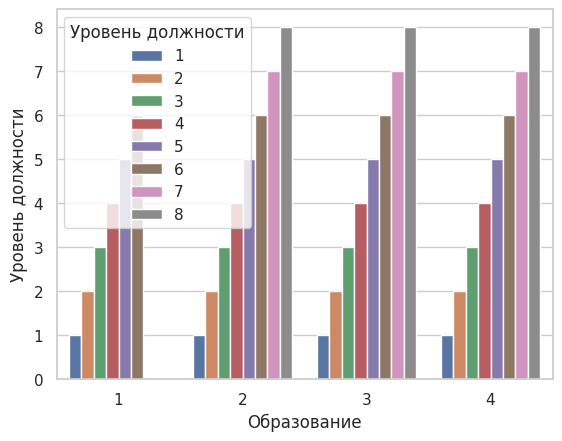

In [ ]:
graphic_universal(data['Образование'],data['Уровень должности'], data)

# Оценка корреляции


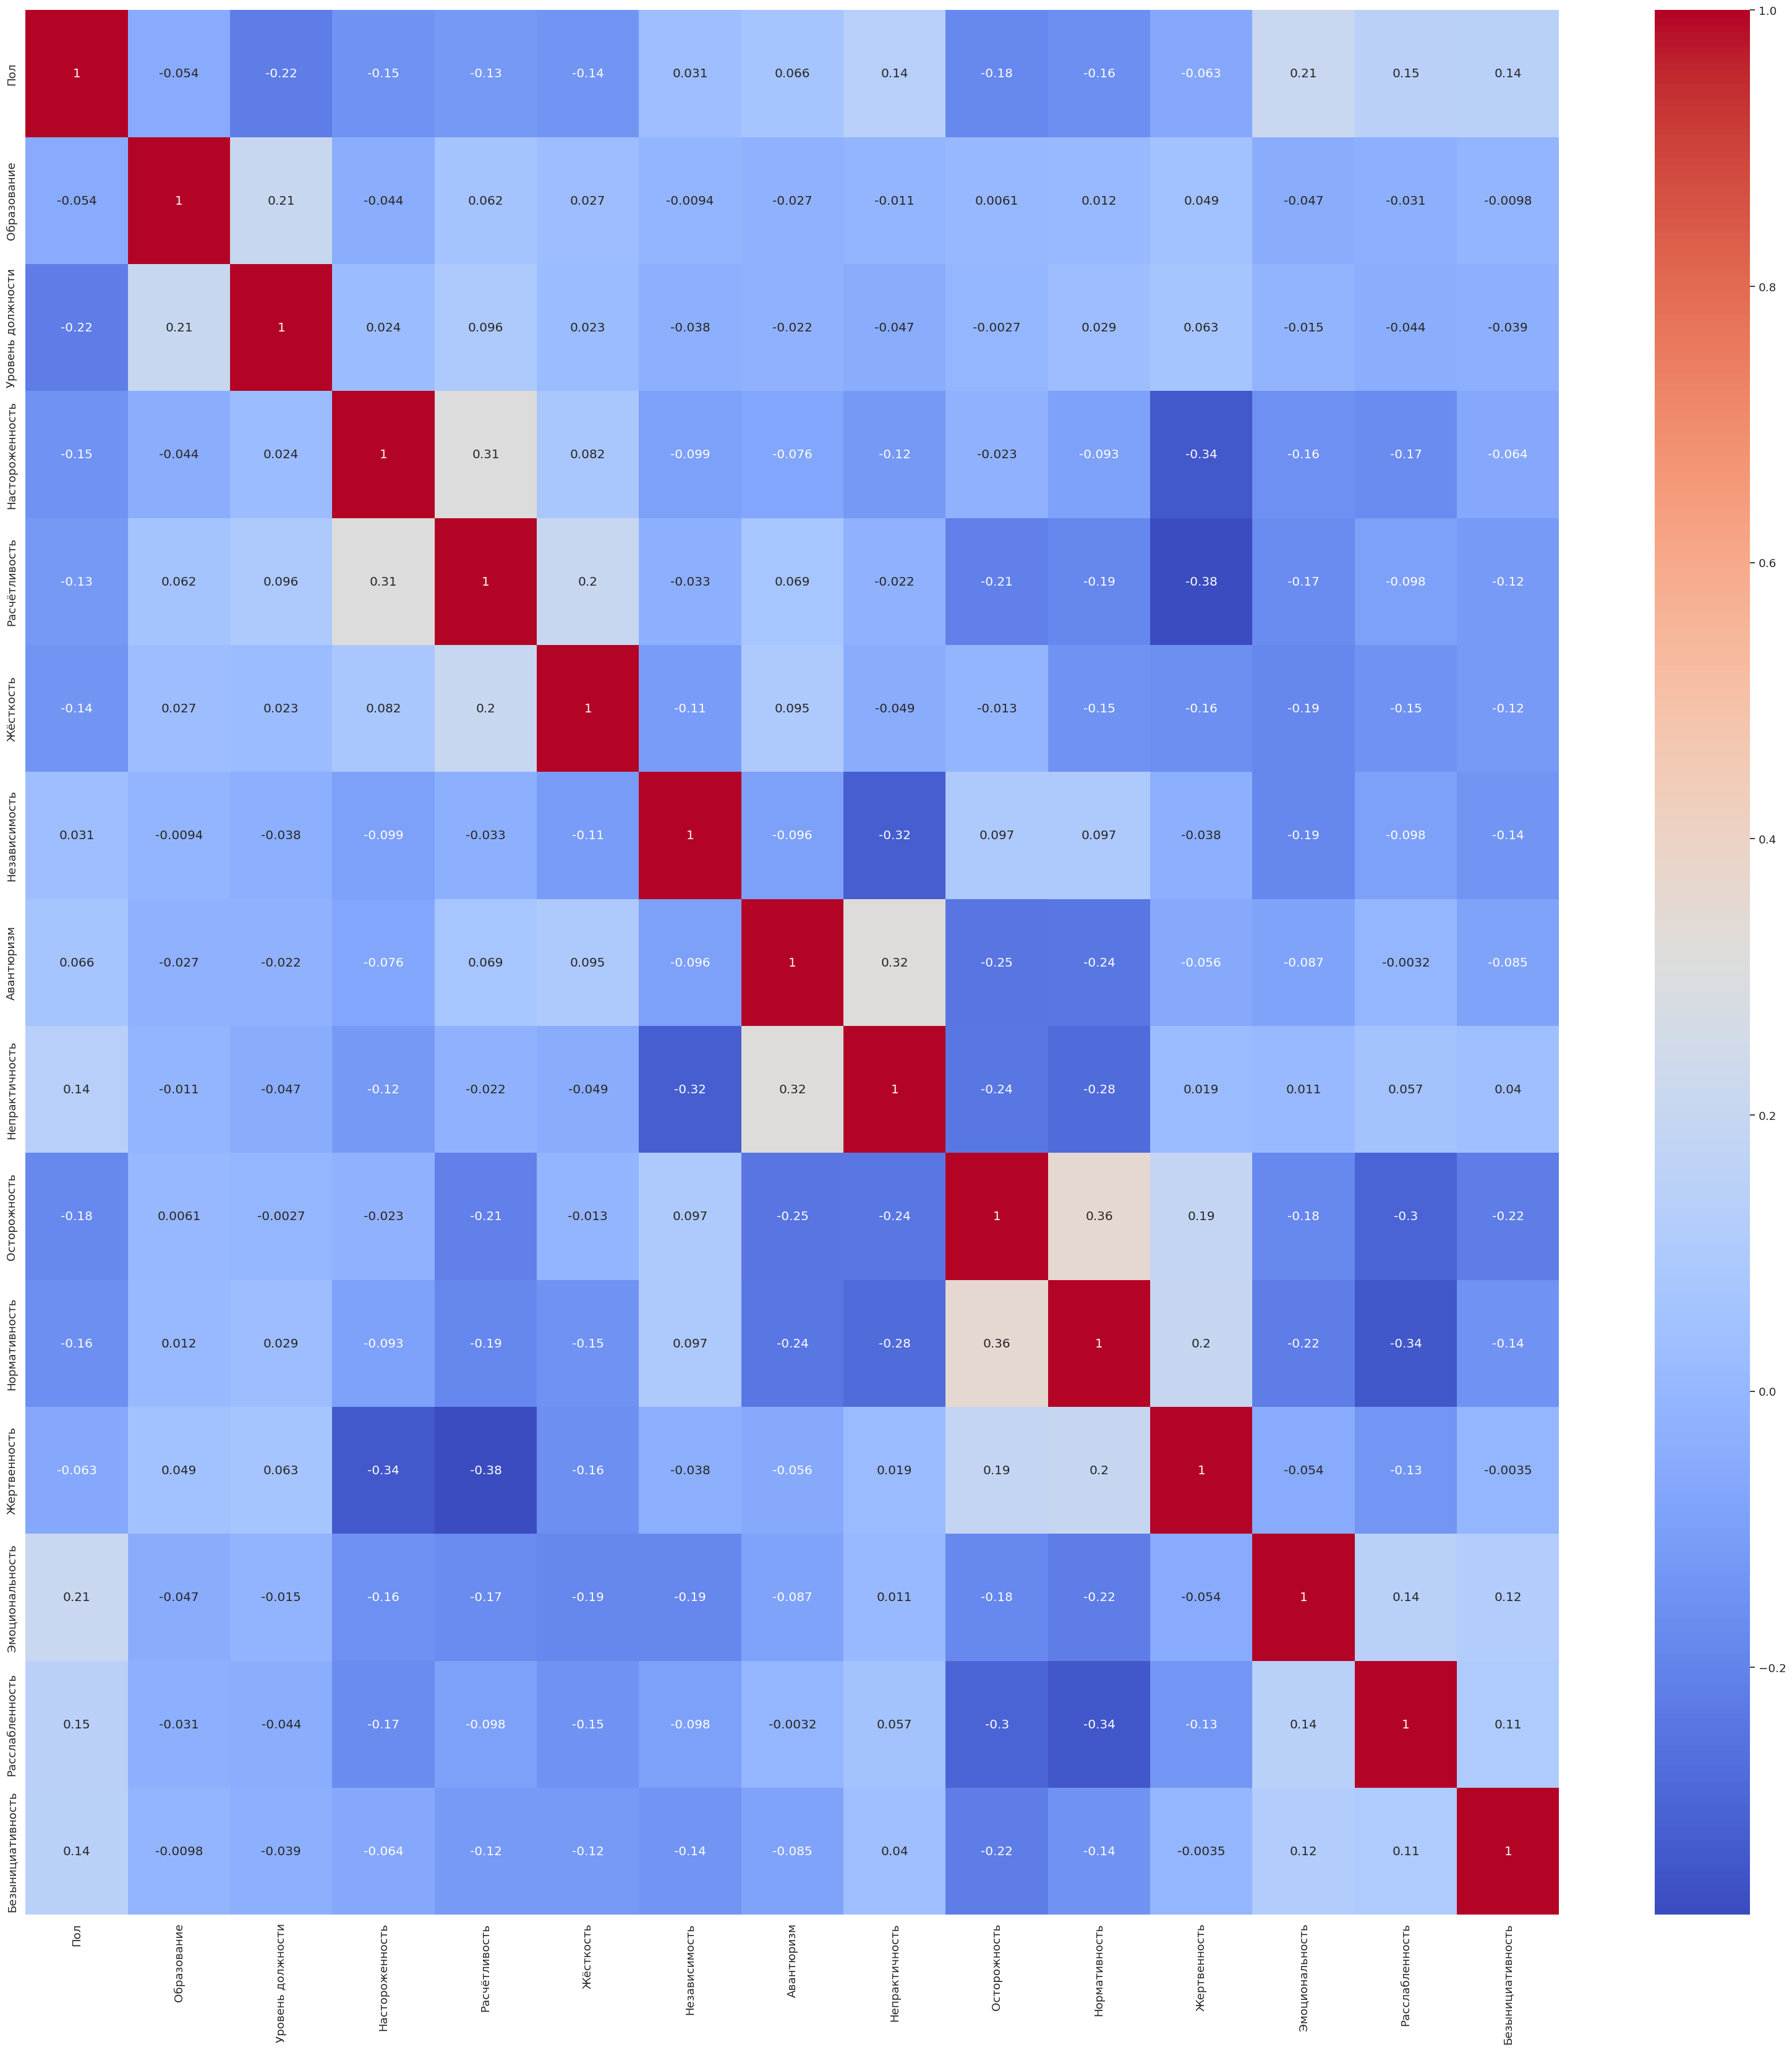

In [ ]:
d_corr = data.corr()
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40), dpi=100)
sns.heatmap(d_corr, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
data.corr()

,Пол,Образование,Уровень должности,Настороженность,Расчётливость,Жёсткость,Независимость,Авантюризм,Непрактичность,Осторожность,Нормативность,Жертвенность,Эмоциональность,Расслабленность,Безынициативность
Пол,1.000000,-0.053884,-0.219485,-0.152230,-0.125894,-0.137346,0.030542,0.065916,0.135770,-0.181613,-0.160882,-0.062623,0.213302,0.146055,0.142258
Образование,-0.053884,1.000000,0.206854,-0.044326,0.062126,0.026590,-0.009444,-0.026527,-0.010822,0.006057,0.012309,0.049333,-0.047338,-0.031173,-0.009805
Уровень должности,-0.219485,0.206854,1.000000,0.023669,0.095626,0.022985,-0.038421,-0.021970,-0.046807,-0.002731,0.029438,0.063079,-0.014825,-0.044086,-0.039093
Настороженность,-0.152230,-0.044326,0.023669,1.000000,0.311403,0.081646,-0.098796,-0.076245,-0.120538,-0.022900,-0.093392,-0.337990,-0.155611,-0.173323,-0.063749
Расчётливость,-0.125894,0.062126,0.095626,0.311403,1.000000,0.203461,-0.033196,0.069123,-0.021977,-0.208448,-0.190482,-0.379098,-0.174302,-0.097935,-0.115718
Жёсткость,-0.137346,0.026590,0.022985,0.081646,0.203461,1.000000,-0.111174,0.095077,-0.049479,-0.012659,-0.147203,-0.162704,-0.186026,-0.146695,-0.119055
Независимость,0.030542,-0.009444,-0.038421,-0.098796,-0.033196,-0.111174,1.000000,-0.096279,-0.324570,0.097226,0.097478,-0.037997,-0.188847,-0.098285,-0.139925
Авантюризм,0.065916,-0.026527,-0.021970,-0.076245,0.069123,0.095077,-0.096279,1.000000,0.321140,-0.247584,-0.241444,-0.056297,-0.086920,-0.003237,-0.085450
Непрактичность,0.135770,-0.010822,-0.046807,-0.120538,-0.021977,-0.049479,-0.324570,0.321140,1.000000,-0.239264,-0.278528,0.018761,0.011348,0.056578,0.040132
Осторожность,-0.181613,0.006057,-0.002731,-0.022900,-0.208448,-0.012659,0.097226,-0.247584,-0.239264,1.000000,0.358384,0.190131,-0.182864,-0.300614,-0.218203


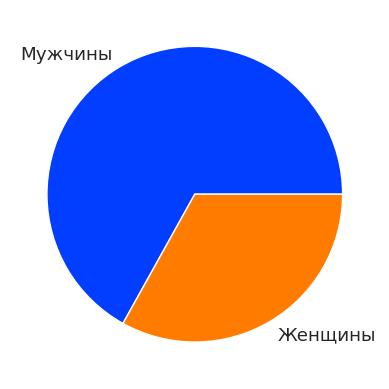

In [ ]:
labels = ['Мужчины','Женщины']
colors = sns.color_palette('bright')
#create pie chart
plt.pie(data['Пол'].value_counts(), labels = labels, colors = colors)
plt.show()

На основании данной диаграммы,можно понять,что большую долю в соц опросе составляли мужчины.

In [ ]:
phik_corr = data.phik_matrix()
phik_corr['Уровень должности']

interval columns not set, guessing: ['Пол', 'Образование', 'Уровень должности', 'Настороженность', 'Расчётливость', 'Жёсткость', 'Независимость', 'Авантюризм', 'Непрактичность', 'Осторожность', 'Нормативность', 'Жертвенность', 'Эмоциональность', 'Расслабленность', 'Безынициативность']


Пол                  0.369297
Образование          0.600974
Уровень должности    1.000000
Настороженность      0.065331
Расчётливость        0.056639
Жёсткость            0.026206
Независимость        0.119528
Авантюризм           0.100924
Непрактичность       0.000000
Осторожность         0.133050
Нормативность        0.177509
Жертвенность         0.106917
Эмоциональность      0.100427
Расслабленность      0.000000
Безынициативность    0.000000
Name: Уровень должности, dtype: float64

В результате корреляцинного анализа видно,что лучшую зависимость с  **Уровенем должности** имеет **образование**.

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# from scipy.stats import chi2_contingency

# cat_vars = ['Пол', 'Образование', 'Уровень должности']

# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# corr = pd.DataFrame(np.zeros((len(cat_vars), len(cat_vars))), columns=cat_vars, index=cat_vars)
# for i in range(len(cat_vars)):
#     for j in range(len(cat_vars)):
#         corr.iloc[i, j] = cramers_v(data[cat_vars[i]], data[cat_vars[j]])

# sns.set(font_scale=1.2)
# plt.figure(figsize=(40, 40))
# sns.heatmap(corr, cmap='coolwarm', annot=True)
# plt.show()

# Построение графиков

array([[<Axes: title={'center': 'Пол'}>,
        <Axes: title={'center': 'Образование'}>,
        <Axes: title={'center': 'Уровень должности'}>,
        <Axes: title={'center': 'Настороженность'}>],
       [<Axes: title={'center': 'Расчётливость'}>,
        <Axes: title={'center': 'Жёсткость'}>,
        <Axes: title={'center': 'Независимость'}>,
        <Axes: title={'center': 'Авантюризм'}>],
       [<Axes: title={'center': 'Непрактичность'}>,
        <Axes: title={'center': 'Осторожность'}>,
        <Axes: title={'center': 'Нормативность'}>,
        <Axes: title={'center': 'Жертвенность'}>],
       [<Axes: title={'center': 'Эмоциональность'}>,
        <Axes: title={'center': 'Расслабленность'}>,
        <Axes: title={'center': 'Безынициативность'}>, <Axes: >]],
      dtype=object)

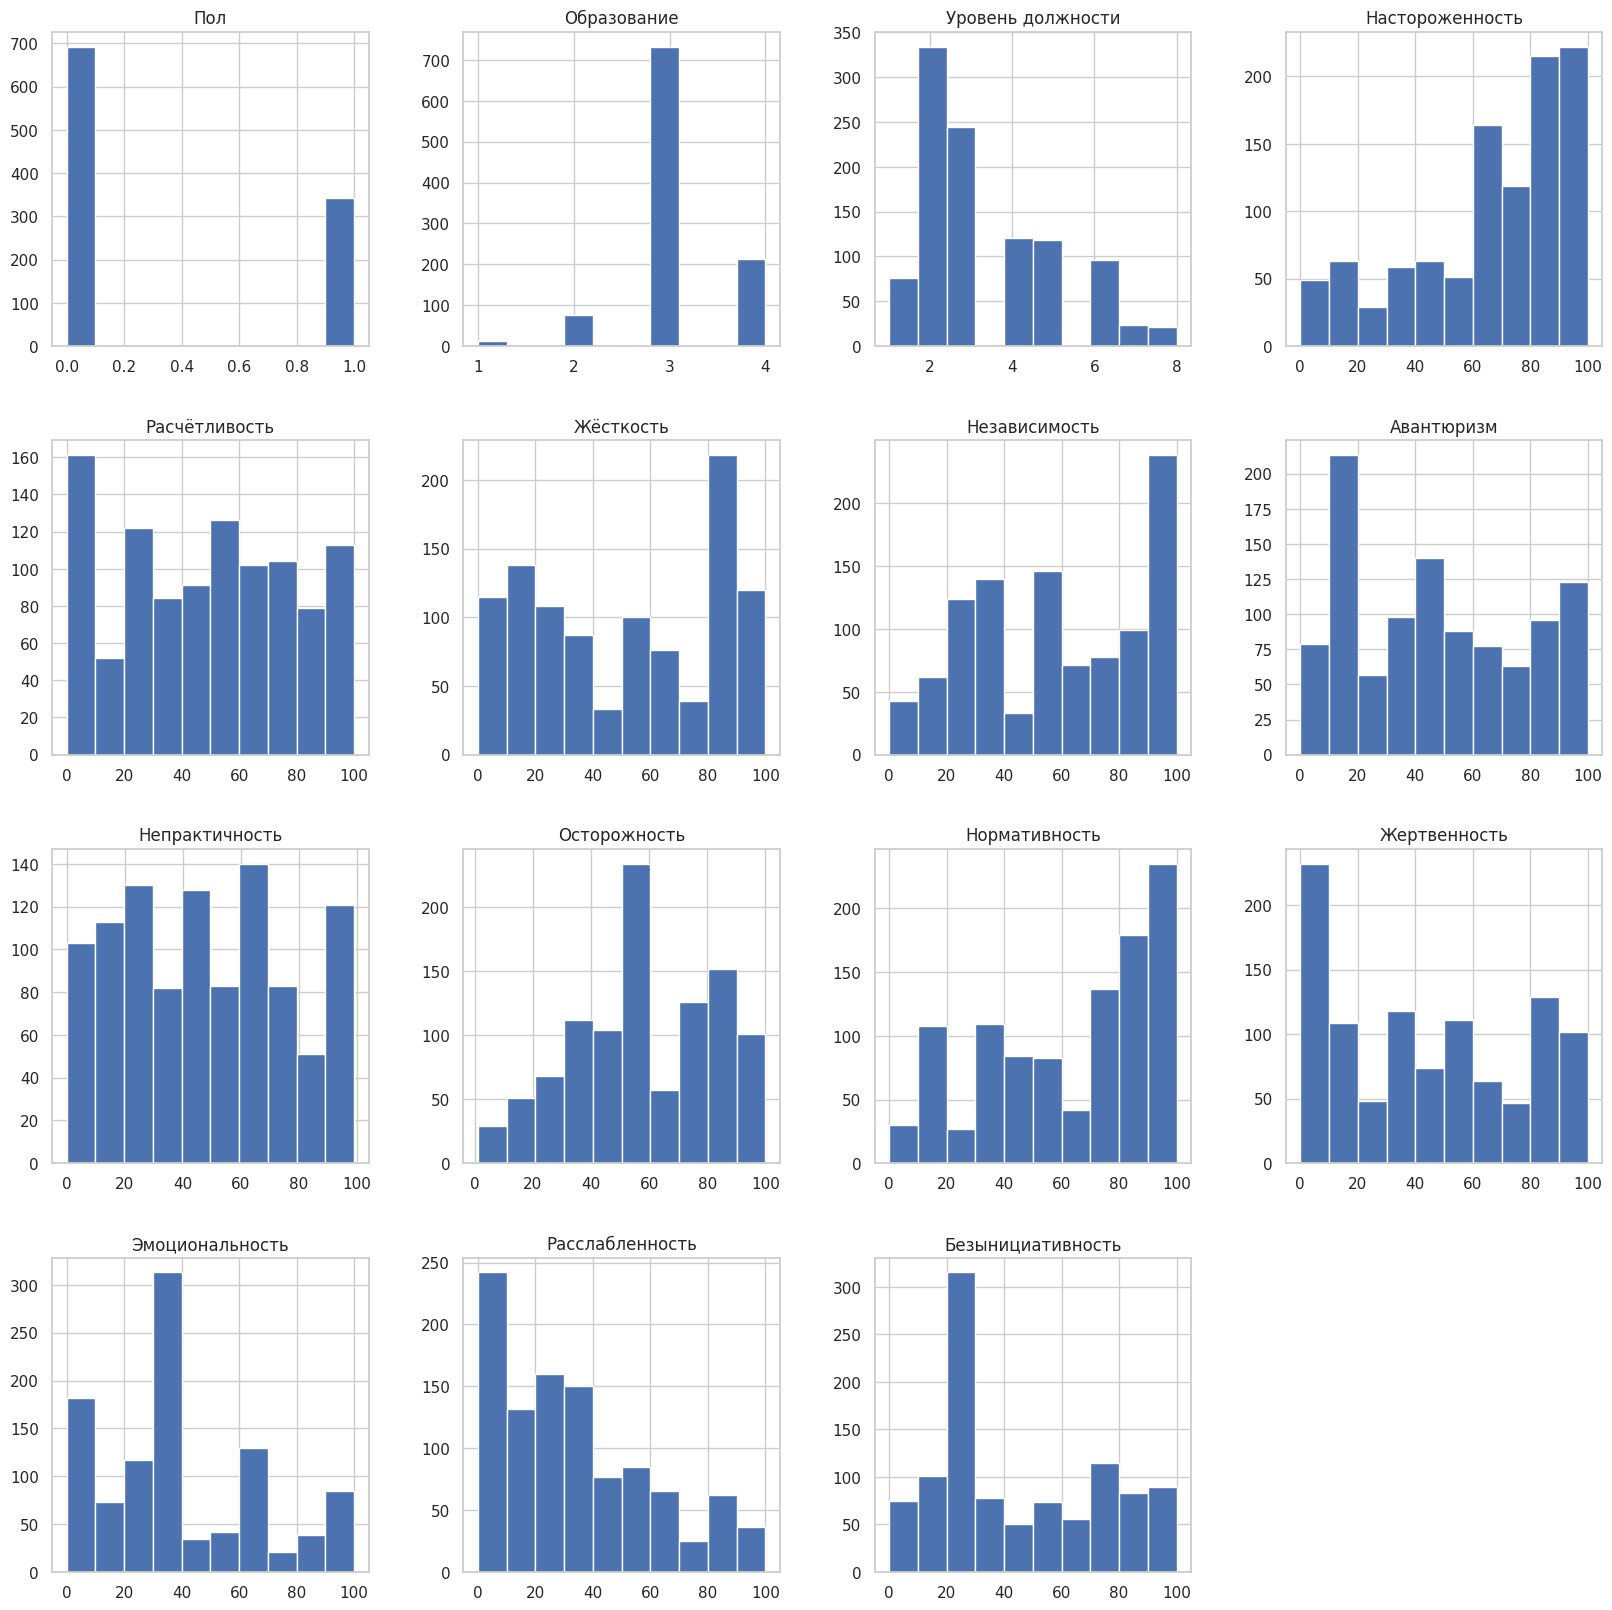

In [ ]:
data.hist(figsize=[20,20])

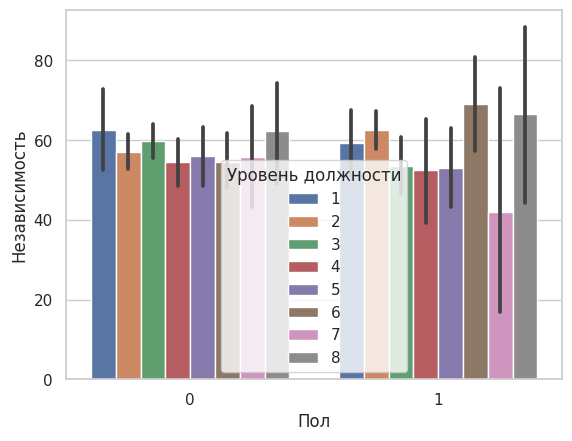

In [ ]:
graphic_universal(data['Пол'],data['Независимость'], data)

In [ ]:

sort_list = []
for i in range(len(d_corr.columns)):
    column_values = d_corr.iloc[:, i]
    for value in column_values:
        if value != 0 and value != 1.0:
          sort_list.append(value)



target = max(sort_list) # максимальная корреляция

def find_name(target):
  is_target_in_df1 = d_corr.isin([target])# Ищем столбец, в котором находится целевое число
  target_column1 = is_target_in_df1.any()
  print(target_column1) # замечаем корреляцию:

In [ ]:

sort_list = list(set(sort_list))
sort_list = sorted(sort_list)
sort_list

[-0.3790977591092333,
 -0.3434996010100421,
 -0.3379895858313009,
 -0.32456977652114477,
 -0.300613944451701,
 -0.27852779178155446,
 -0.24758369965663277,
 -0.24144378966486993,
 -0.23926446324274211,
 -0.22243360385410088,
 -0.21948519511913173,
 -0.21820323497069063,
 -0.2084475204364752,
 -0.19048199753204542,
 -0.18884665194174977,
 -0.18602600299705102,
 -0.1828642568055527,
 -0.1816125216551114,
 -0.1743021296315667,
 -0.17332266932932364,
 -0.16270403869294814,
 -0.16088154385272277,
 -0.15561144765237647,
 -0.15222956170620966,
 -0.14720313534716875,
 -0.1466948834618059,
 -0.14415014763528441,
 -0.139924628973115,
 -0.1373463152077175,
 -0.13300305398160314,
 -0.12589445189527648,
 -0.12053813405966331,
 -0.11905488790446965,
 -0.11571791658389478,
 -0.11117403240910768,
 -0.09879550898944423,
 -0.09828480395880383,
 -0.09793492123763947,
 -0.0962789895381693,
 -0.09339230657238473,
 -0.0869198485122908,
 -0.08545044814875662,
 -0.07624490767427078,
 -0.06374861161483296,
 -0

In [ ]:
target2 = 0.3211400548391334
target3 = 0.3114029934170488
target4 = 0.006056848478347024
target5 = -0.3790977591092333
target6 = -0.1466948834618059
target7 = -0.3434996010100421

In [ ]:
find_name(target5)

Пол                  False
Образование          False
Уровень должности    False
Настороженность      False
Расчётливость         True
Жёсткость            False
Независимость        False
Авантюризм           False
Непрактичность       False
Осторожность         False
Нормативность        False
Жертвенность          True
Эмоциональность      False
Расслабленность      False
Безынициативность    False
dtype: bool


In [ ]:
print(data.columns)

Index(['Пол', 'Образование', 'Уровень должности', 'Настороженность',
       'Расчётливость', 'Жёсткость', 'Независимость', 'Авантюризм',
       'Непрактичность', 'Осторожность', 'Нормативность', 'Жертвенность',
       'Эмоциональность', 'Расслабленность', 'Безынициативность'],
      dtype='object')


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def cluster(x,y):
  X = data[[x,y]]

  n = 2

  kmeans = KMeans(n_clusters = n).fit(X)
  score = silhouette_score(X, kmeans.labels_, metric='euclidean')
  labels = kmeans.labels_

  # Выводим результаты
  print(f'Количество кластеров: {n}')
  print(f'Коэффициент силуэта: {score}')
  plt.title('Кластерный анализ')
  plt.scatter(data[x],data[y],c = labels)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()







In [ ]:
col = list(data.columns)
col

['Пол',
 'Образование',
 'Уровень должности',
 'Настороженность',
 'Расчётливость',
 'Жёсткость',
 'Независимость',
 'Авантюризм',
 'Непрактичность',
 'Осторожность',
 'Нормативность',
 'Жертвенность',
 'Эмоциональность',
 'Расслабленность',
 'Безынициативность']

In [ ]:
import pandas as pd
import statsmodels as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import OLS as OLS
import statsmodels.api as sm

def multi_reg():
  X = data.drop(['Уровень должности'],axis = 1)
  y = data['Уровень должности']
  X = ac(X)
  
  reg = OLS(y,X)
  res = reg.fit()
  
  print(res.summary())

  y_pred = res.predict(X)

  
  
  

    
   
  


 




 







**Отображение**

# **Кластерный анализ**

Количество кластеров: 2
Коэффициент силуэта: 0.6021644588567789


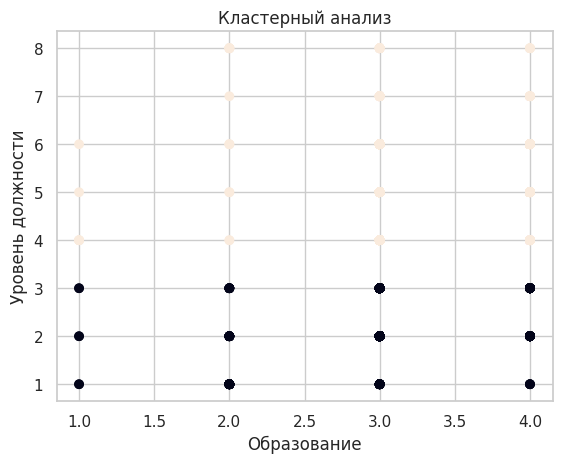

In [ ]:
cluster('Образование','Уровень должности')

Количество кластеров: 2
Коэффициент силуэта: 0.4348505883671822


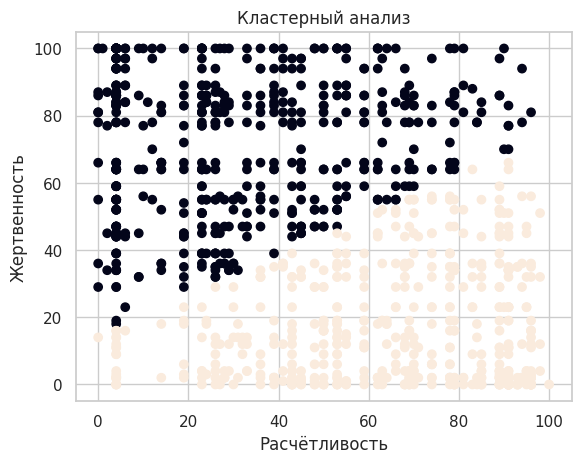

In [ ]:
cluster('Расчётливость','Жертвенность')

Количество кластеров: 2
Коэффициент силуэта: 0.38114560096306993


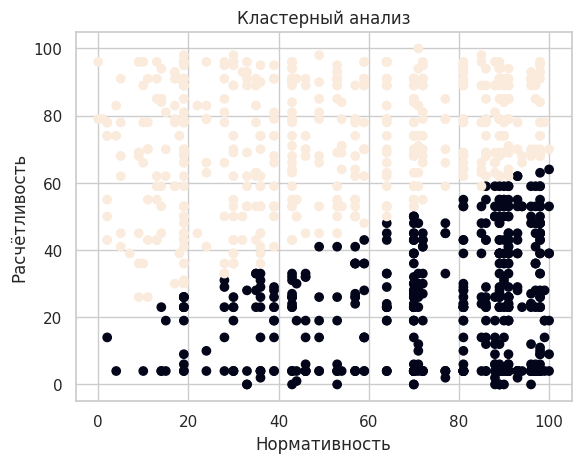

In [ ]:
cluster('Нормативность','Расчётливость')

Количество кластеров: 2
Коэффициент силуэта: 0.6800838126739256


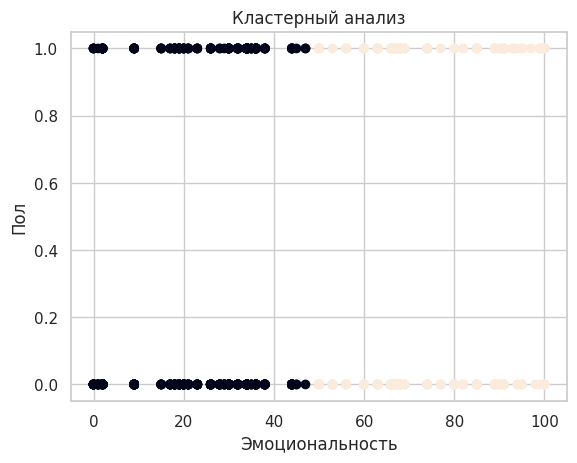

In [ ]:
cluster('Эмоциональность','Пол')

Количество кластеров: 2
Коэффициент силуэта: 0.6021644588567789


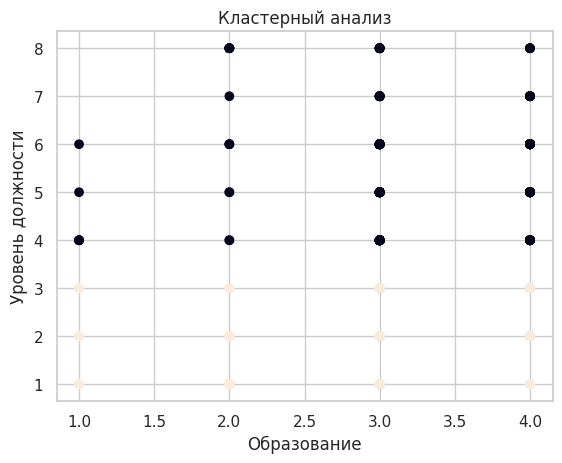

In [ ]:
cluster('Образование','Уровень должности')

Количество кластеров: 2
Коэффициент силуэта: 0.664631404093343


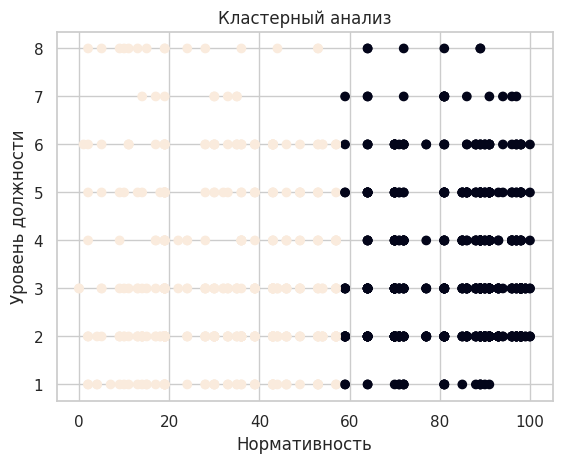

In [ ]:
cluster('Нормативность','Уровень должности')

# **Множественная регрессия**

In [ ]:
multi_reg()

                            OLS Regression Results                            
Dep. Variable:      Уровень должности   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.071
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           1.50e-16
Time:                        12:33:11   Log-Likelihood:                -1939.8
No. Observations:                1034   AIC:                             3910.
Df Residuals:                    1019   BIC:                             3984.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.7508      0.71

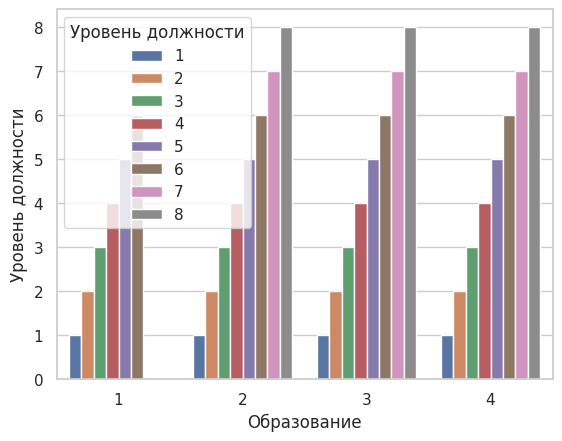

In [ ]:
graphic_universal(data['Образование'],data['Уровень должности'], data)

<Axes: xlabel='Образование', ylabel='Уровень должности'>

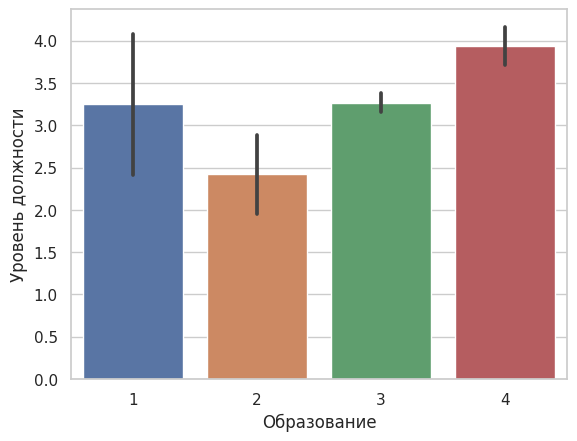

In [ ]:
sns.barplot(data=data, x="Образование", y="Уровень должности")


# **Вывод:**

Исходя из приведенного выше анализа можно сделать заключение, что, условно, специалист, закончивший магистратуру, будет занимать более высокую должность,чем специалист со среднем специальным образованием или человек со степенью бакалавра.